# Unsupervised Machine Learning

On souhaite réduire la dimensionnalité de notre jeu de données en utilisant une PCA. Ceci pour comprendre quels paramètres comptent le plus dans la prise de décision. On testera d'abord sur le jeu comportant les données des galaxies incertaines, puis on les enlèvera pour voir si cela rend les décisions plus nettes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lblearn.datasets import load_galaxies
plt.style.use("seaborn-v0_8-darkgrid")

Meaning of the 2 components:
-0.028 x NVOTE + -0.440 x P_EL + 0.145 x P_CW + 0.096 x P_ACW + 0.215 x P_EDGE + -0.016 x P_DK + -0.002 x P_MG + 0.457 x P_CS + -0.503 x P_EL_DEBIASED + 0.517 x P_CS_DEBIASED
0.396 x NVOTE + -0.094 x P_EL + 0.675 x P_CW + 0.013 x P_ACW + -0.605 x P_EDGE + -0.018 x P_DK + 0.044 x P_MG + 0.083 x P_CS + 0.036 x P_EL_DEBIASED + -0.037 x P_CS_DEBIASED


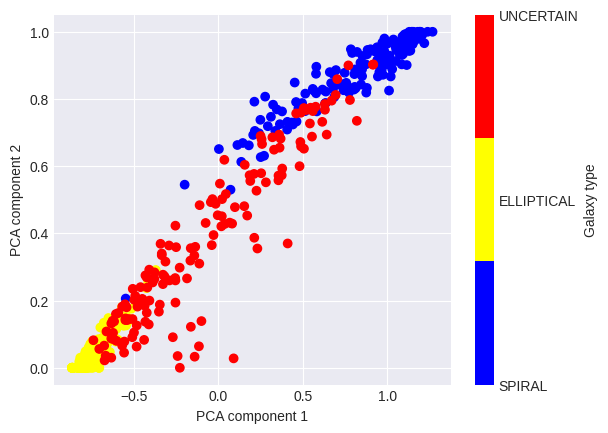

In [2]:
galaxies = load_galaxies(n_samples=150)

# Normaliser les données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(galaxies.data)

# Créer une instance de PCA
pca = PCA(n_components=2)

# Appliquer la PCA sur les données normalisées
X_pca = pca.fit_transform(X_scaled)

# Afficher les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_scaled[:, -1], c=galaxies.target,
           cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'yellow', 'red'])))
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1, 2], format=formatter);
plt.savefig("plots/PCA_main.jpg")
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            galaxies.feature_names)))

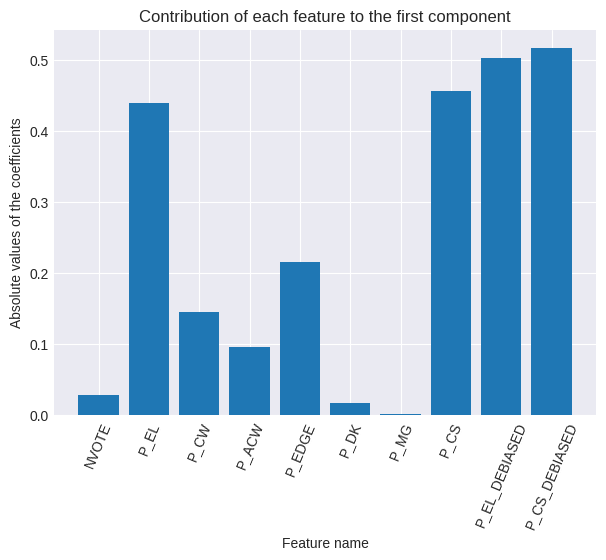

In [3]:
pc1 = pca.components_[0]

plt.figure(figsize=(7, 5))
plt.title("Contribution of each feature to the first component")
plt.bar(galaxies.feature_names, np.abs(pc1))
plt.xticks(rotation=67.5)
# Ajoutez des étiquettes d'axe X et Y
plt.xlabel("Feature name")
plt.ylabel("Absolute values of the coefficients")
plt.savefig("plots/PCA_components.jpg");

For such a small dataset, feature selection is not essential, but if you're using for exemple https://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz this could be useful. 
To select the interesting features, we take the ones smaller to $(q_1 - 1,5 \times \Delta q)$, where $q_1$ is the first quartile and $\Delta q$ the interquartile range.

In [4]:
q1 = np.percentile(pc1, 25)
q3 = np.percentile(pc1, 75)
iqr = q3 - q1
np.array(galaxies.feature_names)[pc1 > (q1 - 1.5 * iqr)]

array(['NVOTE', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG', 'P_CS',
       'P_CS_DEBIASED'], dtype='<U13')

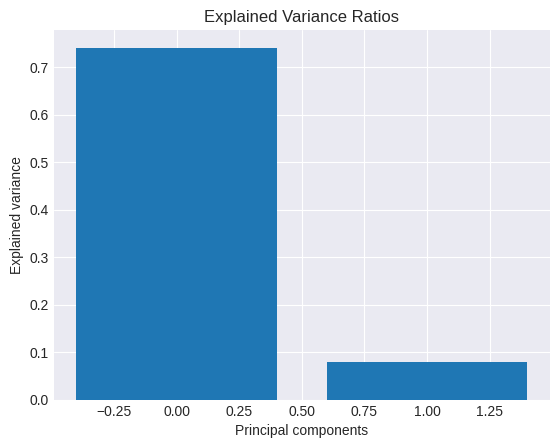

In [5]:
plt.figure()
plt.title("Explained Variance Ratios")
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.savefig("plots/PCA_components_explanation.jpg");

In [6]:
pca.explained_variance_ratio_

array([0.7408892 , 0.07997958])

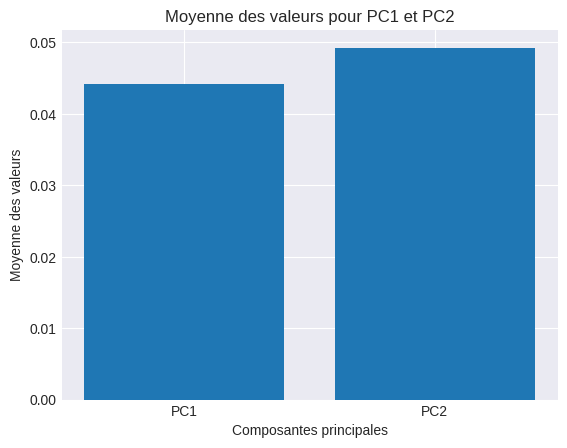

In [7]:
PC1 = pca.components_[0]
PC2 = pca.components_[1]

# Calcul de la moyenne des valeurs de chaque composante principale
mean_PC1 = np.mean(PC1)
mean_PC2 = np.mean(PC2)

# Création du graphique en barres
fig, ax = plt.subplots()
ax.bar(["PC1", "PC2"], [mean_PC1, mean_PC2])

# Ajout de titres et d'étiquettes d'axes
ax.set_title("Moyenne des valeurs pour PC1 et PC2")
ax.set_xlabel("Composantes principales")
ax.set_ylabel("Moyenne des valeurs")
plt.show()

Meaning of the 2 components:
-0.047 x NVOTE + -0.446 x P_EL + 0.231 x P_CW + 0.188 x P_ACW + 0.285 x P_EDGE + -0.177 x P_DK + 0.032 x P_MG + 0.450 x P_CS + -0.441 x P_EL_DEBIASED + 0.446 x P_CS_DEBIASED
0.184 x NVOTE + -0.039 x P_EL + 0.540 x P_CW + 0.069 x P_ACW + -0.539 x P_EDGE + -0.109 x P_DK + 0.601 x P_MG + 0.022 x P_CS + 0.041 x P_EL_DEBIASED + -0.051 x P_CS_DEBIASED


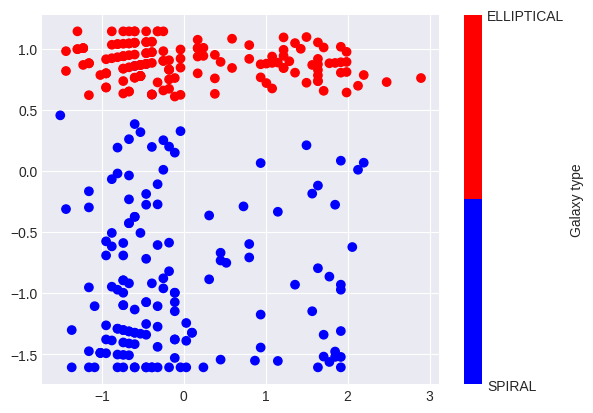

In [8]:
galaxies = load_galaxies(n_samples=150)

X, y = galaxies.data, galaxies.target
idx_non_uncertain = np.where(y != 2)
X = X[idx_non_uncertain, :].reshape(300, 10)
y = y[idx_non_uncertain]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer une instance de PCA
pca = PCA(n_components=2)

# Appliquer la PCA sur les données normalisées
X_pca = pca.fit_transform(X_scaled)

# Afficher les deux premières composantes principales
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'red'])))

formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1], format=formatter);

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            galaxies.feature_names)))

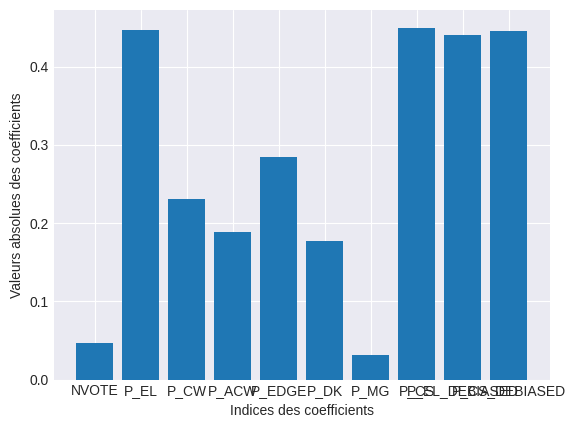

In [9]:
pc1 = pca.components_[0]

plt.bar(galaxies.feature_names, np.abs(pc1))

# Ajoutez des étiquettes d'axe X et Y
plt.xlabel("Indices des coefficients")
plt.ylabel("Valeurs absolues des coefficients");

In [10]:
q1 = np.percentile(pc1, 25)
q3 = np.percentile(pc1, 75)
iqr = q3 - q1
np.array(galaxies.feature_names)[pc1 > (q1 - 1.5 * iqr)]

array(['NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG', 'P_CS',
       'P_EL_DEBIASED', 'P_CS_DEBIASED'], dtype='<U13')

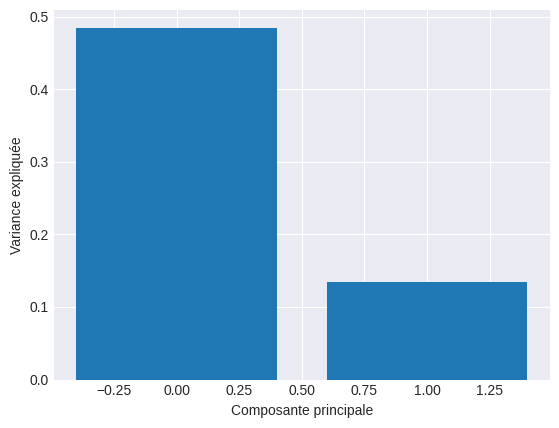

In [11]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée');

In [12]:
component_1 = pca.components_[0]
component_2 = pca.components_[1]

most_important_vars_1 = np.abs(component_1).argsort()[::-1][:5]
most_important_vars_2 = np.abs(component_2).argsort()[::-1][:5]

print("Les 5 variables les plus importantes pour la composante 1 sont:")
print(np.array(galaxies.feature_names)[most_important_vars_1])

print("Les 5 variables les plus importantes pour la composante 2 sont:")
print(np.array(galaxies.feature_names)[most_important_vars_2])

Les 5 variables les plus importantes pour la composante 1 sont:
['P_CS' 'P_EL' 'P_CS_DEBIASED' 'P_EL_DEBIASED' 'P_EDGE']
Les 5 variables les plus importantes pour la composante 2 sont:
['P_MG' 'P_CW' 'P_EDGE' 'NVOTE' 'P_DK']


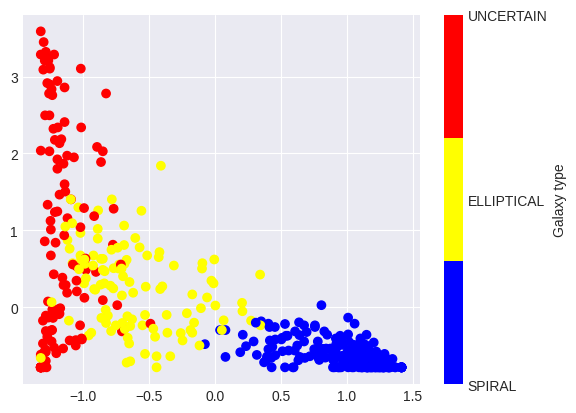

In [13]:
from sklearn.cluster import KMeans

galaxies = load_galaxies(n_samples=150)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(galaxies.data)

k_means = KMeans(n_clusters=3, random_state=0, n_init='auto') # Fixing the RNG in kmeans
k_means.fit(X_scaled)
y_pred = k_means.predict(X_scaled)

plt.scatter(X_scaled[:, 8], X_scaled[:, 4], c=y_pred, cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'yellow', 'red'])))
formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1, 2], format=formatter);